In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msngo
import numpy as np
import re

In [2]:
df = pd.read_csv('25_years_of_salgskimmer.csv')
df.head()

,Latitude,Longitude,Time,Quantity,Unnamed: 4
0,59.019325,17.619529,2021-07-28T22:00:00.0000000Z,1,NaN
1,59.440842,18.667665,2021-07-28T22:00:00.0000000Z,1,NaN
2,59.255912,18.259848,2021-07-28T22:00:00.0000000Z,1,NaN
3,57.743113,11.932870,2021-07-28T22:00:00.0000000Z,1,NaN
4,59.331915,14.147819,2021-07-28T08:30:00.0000000Z,1,NaN


In [3]:
# drop the unameded column
df.drop('Unnamed: 4', axis=1, inplace=True)
df.head()

,Latitude,Longitude,Time,Quantity
0,59.019325,17.619529,2021-07-28T22:00:00.0000000Z,1
1,59.440842,18.667665,2021-07-28T22:00:00.0000000Z,1
2,59.255912,18.259848,2021-07-28T22:00:00.0000000Z,1
3,57.743113,11.932870,2021-07-28T22:00:00.0000000Z,1
4,59.331915,14.147819,2021-07-28T08:30:00.0000000Z,1


<AxesSubplot:>

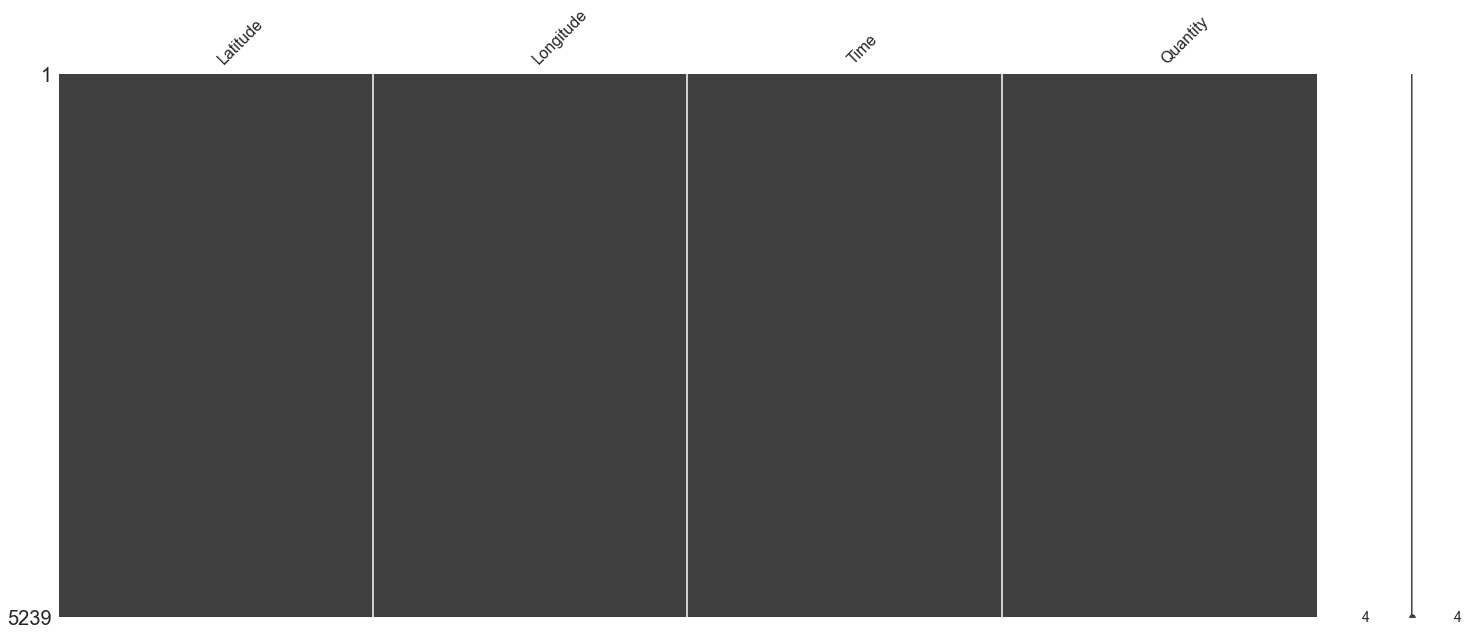

In [34]:
msngo.matrix(df) # no missing values 

In [5]:
df.info() 
# Time columns is a object column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   5239 non-null   float64
 1   Longitude  5239 non-null   float64
 2   Time       5239 non-null   object 
 3   Quantity   5239 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 163.8+ KB


In [6]:
# transforming column to numpy array
time = np.array(df.Time)


def time_column(time):
    # pattern to remove all characters after 'T' in time column 
    pattern = r'\d[0-9]+-\d[0-9]-\d[0-9]'
    
    # extracting to a list 
    Time_ex = []
    for i in time:
        Time_ex.append(re.findall(pattern, i))
    
    return Time_ex
time_column(time)

[['2021-07-28'],
 ['2021-07-28'],
 ['2021-07-28'],
 ['2021-07-28'],
 ['2021-07-28'],
 ['2021-07-27'],
 ['2021-07-27'],
 ['2021-07-27'],
 ['2021-07-27'],
 ['2021-07-27'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-26'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-25'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-24'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'],
 ['2021-07-23'

In [7]:
def extract_years(time):
    # pattern to remove all characters after 'T' in time column 
    pattern = r'\d[0-9]+-\d[0-9]-\d[0-9]'
    
    # extracting to a list 
    Time_ex = []
    for i in time:
        Time_ex.append(re.findall(pattern, i))
    
    return Time_ex

In [8]:
def remove_bracket(lst):
    Time = []
    j = 0
    
    for i in range(len(lst)):
        Time.append(lst[i][j])
    
    return Time

In [19]:
Time_ex = extract_years(time)
df.Time = remove_bracket(Time_ex)
df.head()

,Latitude,Longitude,Time,Quantity
0,59.019325,17.619529,2021-07-28,1
1,59.440842,18.667665,2021-07-28,1
2,59.255912,18.259848,2021-07-28,1
3,57.743113,11.932870,2021-07-28,1
4,59.331915,14.147819,2021-07-28,1


In [20]:
df_1 = df.copy() # make a copy of df

In [21]:
# extract the years from the Time
df_1['Time'] = df_1['Time'].str[:4]
df_1.head()

,Latitude,Longitude,Time,Quantity
0,59.019325,17.619529,2021,1
1,59.440842,18.667665,2021,1
2,59.255912,18.259848,2021,1
3,57.743113,11.932870,2021,1
4,59.331915,14.147819,2021,1


In [22]:
gp = df_1.groupby('Time')[['Longitude']].max().reset_index()
gp

,Time,Longitude
0,1996,14.903895
1,1997,12.908027
2,1998,12.913776
3,1999,13.447950
4,2000,13.447950
5,2001,13.447950
6,2002,13.510195
7,2003,16.566389
8,2004,13.771218
9,2005,16.586826


## At what rate has the willow shimmer butterfly moved north?

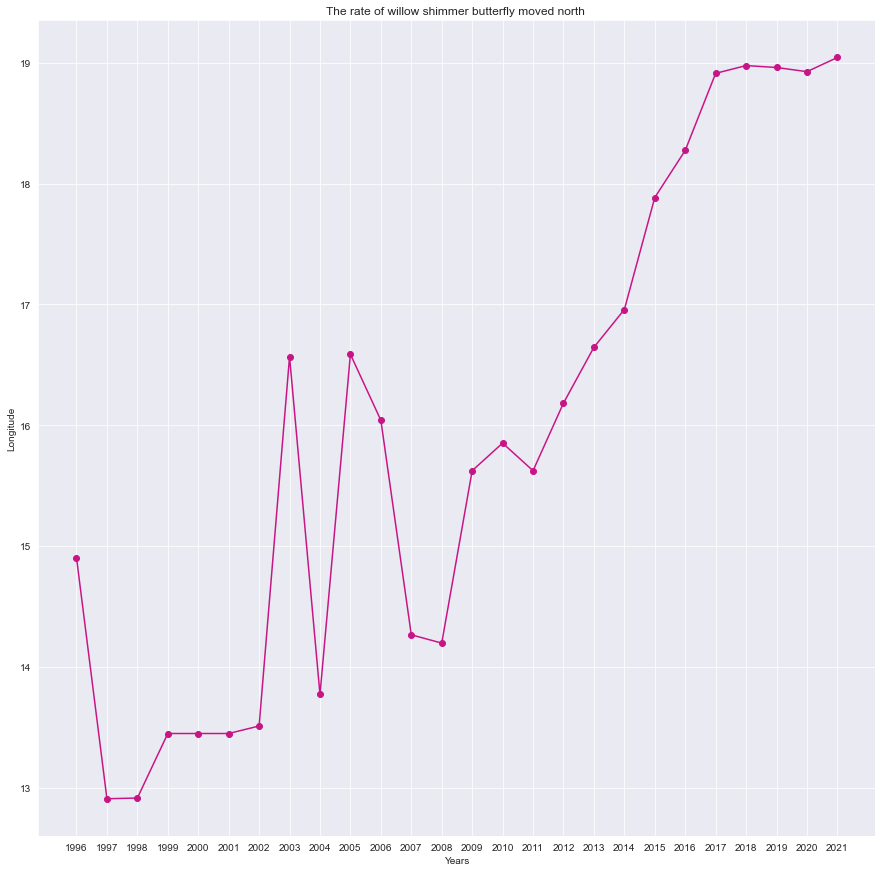

In [33]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")
plt.plot('Time', 'Longitude', data=gp, marker='o', color='mediumvioletred')
plt.title('The rate of willow shimmer butterfly moved north ')
plt.xlabel('Years')
plt.ylabel('Longitude')
plt.show()

 ## Calculate the mean latitude of observations for each year and plot how it has changed over time

In [38]:
gp_lat = df_1.groupby('Time')[['Latitude']].mean().reset_index()
gp_lat.head()

,Time,Latitude
0,1996,55.737147
1,1997,55.523371
2,1998,55.525382
3,1999,55.695175
4,2000,55.931929


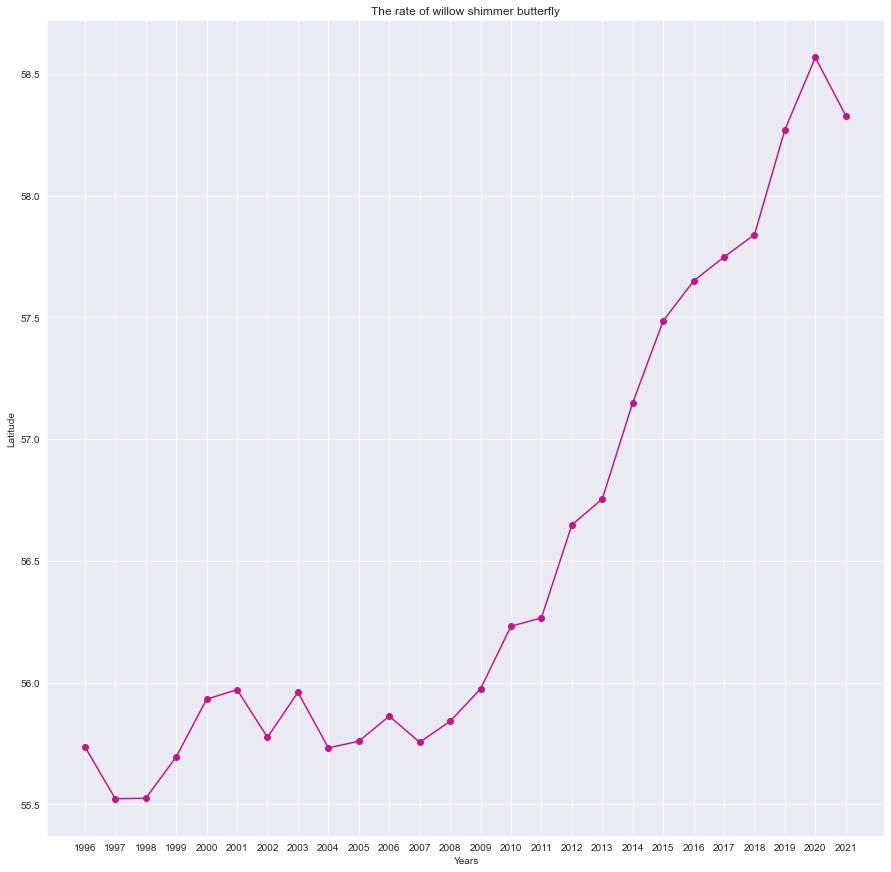

In [42]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid")
plt.plot('Time', 'Latitude', data=gp_lat, marker='o', color='mediumvioletred')
plt.title('The rate of willow shimmer butterfly')
plt.xlabel('Years')
plt.ylabel('Latitude')
plt.show()

## How has number of observations changed over times?

In [45]:
gp_obs = df_1.groupby('Time')[['Quantity']].sum().reset_index()
gp_obs.head()

,Time,Quantity
0,1996,9
1,1997,3
2,1998,1
3,1999,7
4,2000,3


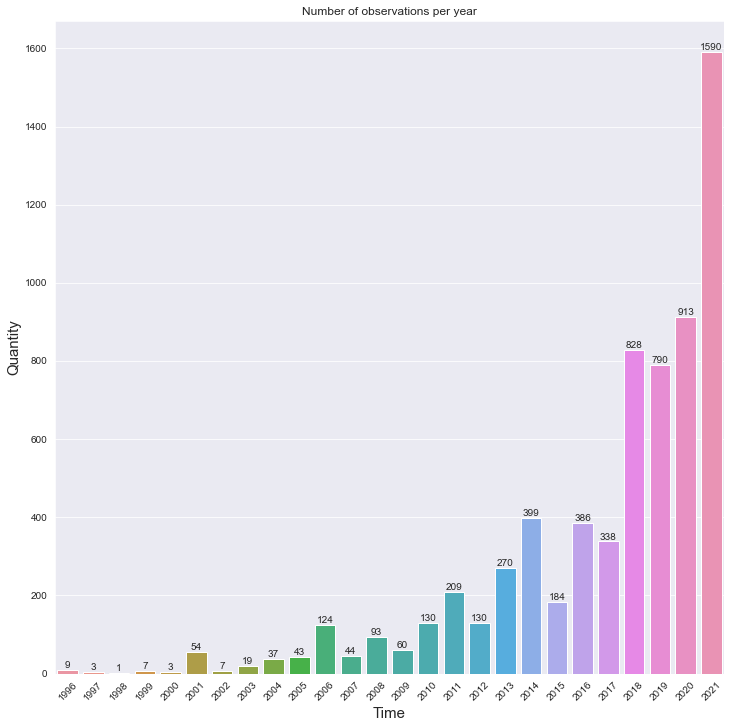

In [60]:
plt.figure(figsize=(12,12))
plt.title('Number of observations per year')

ax = sns.barplot(y='Quantity', x='Time', data=gp_obs)
ax.bar_label(ax.containers[0])

plt.xlabel('Time', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.xticks(rotation=45)
plt.show()

## When did the willow shimmer butterfly arrive to Gotland?

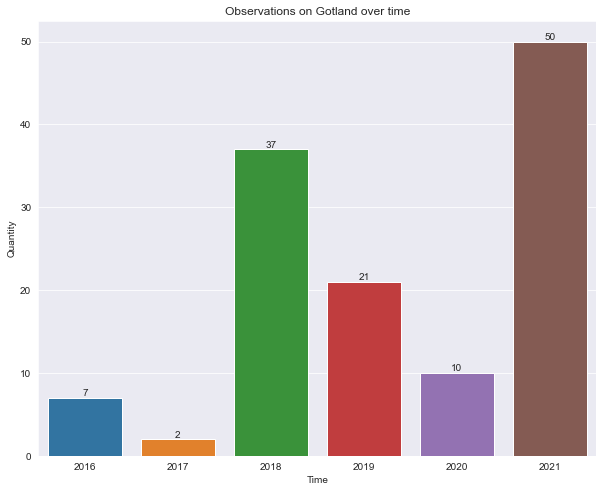

In [128]:
# Coordinates that define Gotland; Latitude 56.9-58.0 & Longitude 18.1-19.35
# Extract all the dates where Longitude and Latitude is on Gotland

df_gotland =  df_1.loc[(df_1['Latitude'] >= 56.9) & (df_1['Latitude'] <= 58) 
         & (df_1['Longitude'] > 18.1) & (df_1['Longitude'] < 19.35)]

gp_gotland = df_gotland.groupby('Time')[['Quantity']].sum().reset_index()


plt.figure(figsize=(10,8))
plt.title('Observations on Gotland over time')
ax = sns.barplot(data=gp_gotland, x='Time', y='Quantity')
ax.bar_label(ax.containers[0])
plt.show()


## At what time of the year is willow shimmer butterfly most active?

In [185]:
gp_amount = df.groupby('Time')[['Quantity']].sum().sort_values(by='Quantity').reset_index()

In [182]:
gp_amount["Time"] = pd.to_datetime(gp_amount["Time"])

In [189]:
gp_amount = gp_amount[(gp_amount.Quantity != 1) & (gp_amount.Quantity != 2) & (gp_amount.Quantity != 3) ]

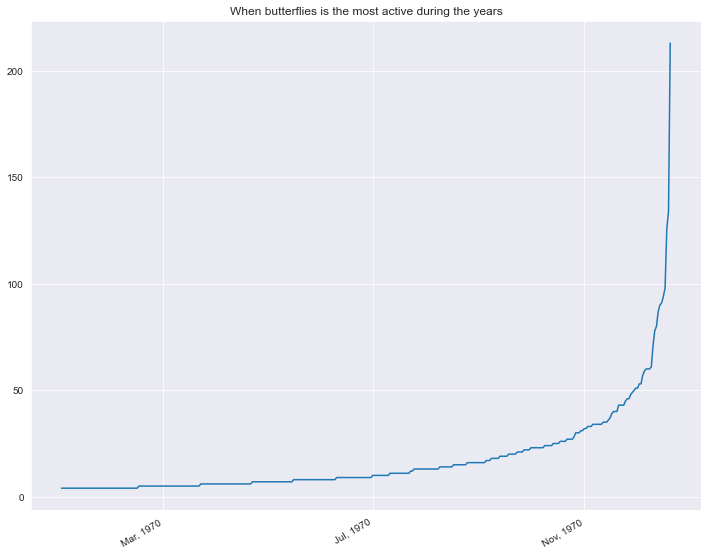

In [238]:
value = gp_amount['Quantity']
date = gp_amount['Time']

import matplotlib.dates as mdates


half_year_locator = mdates.MonthLocator(interval=4)
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig, ax = plt.subplots(figsize=(12,10))

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(month_year_formatter)
ax.plot(date, value)
plt.title('When butterflies is the most active during the years')
# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()